In [145]:
import pickle as pk
import pandas as pd
import numpy as np
import copy

data=pd.read_csv("./Data/BankChurners.csv")

data['Attrition_Flag'] = data['Attrition_Flag'].map({1: 'Existing Customer', 0: 'Attrited Customer'})


In [146]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# # print)str
# scaled_x_train=pd.read_csv("./Data/scaled_x_train_smote2.csv")
# scaled_x_test=pd.read_csv("./Data/scaled_x_test_smote2.csv")
# # pd.read_csv("./Data/scaled_x_test_smote2.csv")
# scaled_x_cv=pd.read_csv("./Data/scaled_x_cv_smote2.csv")

y_test_copy=pd.read_csv("./Data/y_test_smote3.csv")
x_test=pd.read_csv("./Data/x_test_smote3.csv")

X_train_res=pd.read_csv("./Data/X_train_res_smote3.csv")
y_train_res=pd.read_csv("./Data/y_train_res_smote3.csv")

X_train_res=X_train_res.drop('Unnamed: 0',axis=1)
y_train_res=y_train_res.drop('Unnamed: 0',axis=1)
x_test=x_test.drop('Unnamed: 0',axis=1)


y_test_copy=y_test_copy.drop('Unnamed: 0',axis=1)
# scaled_x_test=scaled_x_test.drop('Unnamed: 0',axis=1)
# scaled_x_cv=scaled_x_cv.drop('Unnamed: 0',axis=1)


y_test=y_test_copy

y_valid=pd.read_csv("./Data/y_valid_smote3.csv")
x_valid=pd.read_csv("./Data/x_valid_smote3.csv")

x_valid=x_valid.drop('Unnamed: 0',axis=1)
y_valid=y_valid.drop('Unnamed: 0',axis=1)

y_valid.shape




y_train_res['Attrition_Flag']=y_train_res['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})
y_valid['Attrition_Flag']=y_valid['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})
y_test_copy['Attrition_Flag']=y_test_copy['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})



In [147]:
#  Scaling features
scaler = StandardScaler()
scaler.fit(X_train_res)

scaled_x_train = scaler.transform(X_train_res)
scaled_x_test = scaler.transform(x_test)


scaled_x_valid=scaler.transform(x_valid)
# scaled_y_cv =scaler.transform(y_cv)

scaled_x_train.shape


scaled_x_train.shape

(7675, 32)

In [148]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [149]:
kmeanModel= KMeans(n_clusters=16, init='k-means++', max_iter=1000, n_init=10, random_state=0)
Xtrain=kmeanModel.fit_transform(scaled_x_train)

# scaled_x_train[:,5].shape
kmeanModel.predict(scaled_x_train)
y_train_res.shape

df=pd.DataFrame(columns=X_train_res.columns)
df.shape

df=pd.DataFrame(scaled_x_train)
df.columns=X_train_res.columns



#                 ['k_means','target','1','2','3','4','5'])
# df['5']=scaled_x_train[:,5]
# df['6']=scaled_x_train[:,6]
df['k_means']=kmeanModel.predict(scaled_x_train)
df['target']=y_train_res
print(df.shape)

(7675, 34)


In [150]:
Xvalid=kmeanModel.transform(scaled_x_valid)

In [151]:
XtrainData.shape

(7675, 32)

In [152]:
Xvalid

array([[ 7.35582623,  5.60375117,  7.18623168, ...,  5.14904066,
         6.7546215 , 27.46151671],
       [ 9.71587409,  8.92641324,  9.03088296, ...,  8.55344962,
         9.24700354, 27.63178362],
       [ 8.12208827,  7.48258923,  7.41857019, ...,  7.18346448,
         7.68531536, 27.27520064],
       ...,
       [ 6.99264225,  5.48579692,  6.06326103, ...,  4.93452826,
         6.32122702, 27.14940592],
       [ 8.05842462,  7.22606344,  8.15337096, ...,  7.16621905,
         4.44736499, 27.62435391],
       [ 7.4890939 ,  5.34455036,  7.40699903, ...,  6.25830121,
         6.86015692, 27.12932602]])

In [153]:
XValidclusters=kmeanModel.predict(scaled_x_valid)
XValidclusters

array([10,  6,  8, ..., 11, 14,  8], dtype=int32)

In [154]:
XValidclusters=pd.DataFrame(XValidclusters,columns=["Cluster"])

In [155]:
XtrainClusters=kmeanModel.predict(scaled_x_train)
XtrainClusters=pd.DataFrame(XtrainClusters,columns=["Cluster"])
XtrainClustersEn = pd.get_dummies(XtrainClusters['Cluster'])
XtrainClustersEn.shape

(7675, 16)

In [156]:
z=np.array(XtrainClustersEn)
z

# XValidclustersEn[[0,1],]

k=Xtrain


XtrainData=np.append(k,z,1)
XtrainData.shape

(7675, 32)

In [157]:
# enc = OneHotEncoder(handle_unknown='ignore')

In [158]:
# enc.fit(XValidclusters)

In [159]:
XValidclusters.Cluster.unique()

array([10,  6,  8, 14, 11,  0,  3,  5,  9, 12,  1,  4,  2,  7, 13, 15],
      dtype=int32)

In [160]:
XValidclustersEn = pd.get_dummies(XValidclusters['Cluster'])
XValidclustersEn.shape

(2026, 16)

In [161]:
Xvalid

array([[ 7.35582623,  5.60375117,  7.18623168, ...,  5.14904066,
         6.7546215 , 27.46151671],
       [ 9.71587409,  8.92641324,  9.03088296, ...,  8.55344962,
         9.24700354, 27.63178362],
       [ 8.12208827,  7.48258923,  7.41857019, ...,  7.18346448,
         7.68531536, 27.27520064],
       ...,
       [ 6.99264225,  5.48579692,  6.06326103, ...,  4.93452826,
         6.32122702, 27.14940592],
       [ 8.05842462,  7.22606344,  8.15337096, ...,  7.16621905,
         4.44736499, 27.62435391],
       [ 7.4890939 ,  5.34455036,  7.40699903, ...,  6.25830121,
         6.86015692, 27.12932602]])

In [162]:
Xvalid[0]

array([ 7.35582623,  5.60375117,  7.18623168,  6.49747395,  4.63301126,
        5.90254497,  8.16734168, 12.38278229,  6.96429959,  7.46312683,
        3.88727625,  6.54522355,  6.11853051,  5.14904066,  6.7546215 ,
       27.46151671])

In [163]:
z=np.array(XValidclustersEn)
z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [164]:
# XValidclustersEn[[0,1],]

In [165]:
k=Xvalid


In [166]:
XvalidData=np.append(k,z,1)

In [167]:
scaled_XKmeans = scaler.transform(XtrainData)
scaled_XValid = scaler.transform(XvalidData)


# scaled_x_valid=scaler.transform(x_valid)


In [168]:
# df['k_means']=kmeanModel.predict(scaled_x_train)
# df['target']=y_train_res
from sklearn.preprocessing import normalize
scaled_XKmeans=normalize(scaled_XKmeans, norm='l2', axis=1, copy=True, return_norm=False)
scaled_XValid=normalize(scaled_XValid, norm='l2', axis=1, copy=True, return_norm=False)

In [5]:
# pca_reload = pk.load(open("pca_finalDF_data1.pkl",'rb'))
# result_new = pca_reload .transform(X)

In [7]:
# pca_reload.shape

(7675, 23)

In [11]:
def create_model(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=input_shape))
    for i in range(hidden_layers):
          # Add one hidden layer
        model.add(layers.Dense(8, activation=activation))

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model


In [169]:

import joblib

# joblib.dump(DTmodel, 'DTgrid_NLP.pkl')

from sklearn import metrics

# tfidf_vector_X = xtrain_tfidf_ngram.toarray()  #//shape - (3,6)
# tfidf_vector_valid= xvalid_tfidf_ngram.toarray() #//shape - (3,6)
# tfidf_vector_X = tfidf_vector_X[:, :, None] #//shape - (3,6,1) 
# tfidf_vector_valid = tfidf_vector_valid[:, :, None] #//shape - (3,6,1)


# tfidf_vector_X.shape[1:]

from tensorflow import keras
from tensorflow.keras import layers

# input_shape= [x_train.shape[1]]

# NNmodel = create_model(optimizer='adam', activation = 'sigmoid', hidden_layers=1,learning_rate=0.01)




from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold


In [170]:
# sess.run(optimizer._lr)
def create_modelWithDropBatch(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=input_shape)) #thisone inc
    for i in range(hidden_layers):
          # Add one hidden layer
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(8, activation='relu')) #thisone inc 256

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model



In [171]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [172]:
# pca_finalDF.shape
# input_shape

In [173]:
model_Batch_drop_relu =  KerasClassifier(build_fn=create_modelWithDropBatch, verbose = False)  

In [174]:
XvalidData.shape

(2026, 32)

In [175]:
Xvalid.

SyntaxError: invalid syntax (<ipython-input-175-3c6c48f96c49>, line 1)

In [176]:

input_shape=[32]
#
model_Batch_drop_relu =  KerasClassifier(build_fn=create_modelWithDropBatch, verbose = False)  

param_grid={'learning_rate':[0.1,0.001,0.01,0.05,0.05,0.5],'hidden_layers':[2,4,6,8,10]}

gridNN_Batch_drop_relu = GridSearchCV(estimator = model_Batch_drop_relu, param_grid = param_grid)

model_Batch_drop_relu.get_params()

history_Batch_drop_relu = gridNN_Batch_drop_relu.fit(
     XtrainData, y_train_res,
    validation_data=(XvalidData, y_valid),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)

print(history_Batch_drop_relu.best_params_)

print(history_Batch_drop_relu.best_score_)
# print(grid.best_params_)

KeyboardInterrupt: 

In [87]:
# import timeit

# start = timeit.default_timer()

# #Your statements here

# bestNN=create_modelWithDropBatch(hidden_layers= 6, learning_rate= 0.05)
# history2 = bestNN.fit(
#      pca_finalDF, y_train_res,
#     validation_data=(pcavalidData, y_valid),
#     batch_size=512,
#     epochs=200,
# #     callbacks=[early_stopping],
# )
# stop = timeit.default_timer()

# print('Time: ', stop - start)  


In [58]:
# sess.run(optimizer._lr)
def create_modelWithDropBatchOpt(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=input_shape))
    for i in range(hidden_layers):
          # Add one hidden layer
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(8, activation='tanh'))

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model



In [96]:
y_valid

,Attrition_Flag
0,1
1,1
2,1
3,1
4,1
...,...
2021,1
2022,0
2023,1
2024,1


In [127]:
scaled_XKmeans

array([[ 0.01948457,  0.02918462,  0.03451587, ..., -0.00055809,
         0.15137822, -0.00123852],
       [ 0.01721252,  0.02667761,  0.02651348, ..., -0.00059958,
        -0.00023342, -0.0013306 ],
       [ 0.0190794 ,  0.03337567,  0.03016379, ..., -0.00059295,
        -0.00023084, -0.00131588],
       ...,
       [ 0.01277982,  0.01521045,  0.01948226, ...,  0.06456833,
        -0.00023805, -0.00135696],
       [ 0.01438093,  0.02352488,  0.02788791, ..., -0.00060237,
        -0.00023451, -0.00133679],
       [ 0.01223158,  0.01222023,  0.01984454, ...,  0.06543778,
        -0.00024125, -0.00137523]])

In [126]:
scaled_XValid

array([[ 0.01503103,  0.02082295,  0.02752151, ..., -0.0006037 ,
        -0.00023503, -0.00133973],
       [ 0.02267979,  0.03898833,  0.03545706, ..., -0.00055858,
        -0.00021746, -0.0012396 ],
       [ 0.01788544,  0.03246936,  0.02852477, ..., -0.00059624,
        -0.00023212, -0.00132317],
       ...,
       [ 0.01390084,  0.02055242,  0.02145434, ..., -0.00061832,
        -0.00024072, -0.00137219],
       [ 0.01714393,  0.02998885,  0.03186489, ..., -0.0005797 ,
         0.15724032, -0.00128648],
       [ 0.01565251,  0.01926616,  0.02897343, ..., -0.00060704,
        -0.00023633, -0.00134715]])

In [137]:
# create_modelWithDropBatch3
# sess.run(optimizer._lr)
def create_modelWithDropBatch3(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=input_shape)) #thisone inc
    for i in range(hidden_layers):
          # Add one hidden layer
#         model.add(layers.BatchNormalization())
#         model.add(layers.Dropout(0.5))
        model.add(layers.Dense(256, activation='relu')) #thisone inc 256

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model



In [140]:


import timeit

start = timeit.default_timer()

#Your statements here

bestNN3=create_modelWithDropBatch3(hidden_layers= 2, learning_rate= 0.001)
history4 = bestNN3.fit(
     scaled_XKmeans, y_train_res,
    validation_data=(scaled_XValid, y_valid),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)
stop = timeit.default_timer()

print('Time: ', stop - start)  


Epoch 1/200
15/15 [==============================] - 1s 16ms/step - loss: 0.6555 - accuracy: 0.6038 - val_loss: 0.5079 - val_accuracy: 0.8327
Epoch 2/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6404 - accuracy: 0.6634 - val_loss: 0.5197 - val_accuracy: 0.8327
Epoch 3/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6329 - accuracy: 0.6721 - val_loss: 0.5203 - val_accuracy: 0.8327
Epoch 4/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6372 - accuracy: 0.6644 - val_loss: 0.5318 - val_accuracy: 0.8327
Epoch 5/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6368 - accuracy: 0.6643 - val_loss: 0.5054 - val_accuracy: 0.8327
Epoch 6/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6354 - accuracy: 0.6674 - val_loss: 0.5288 - val_accuracy: 0.8327
Epoch 7/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6357 - accuracy: 0.6657 - val_loss: 0.5324 - val_accuracy: 0.8327
Epoch 8/200


Epoch 59/200
15/15 [==============================] - 0s 7ms/step - loss: 0.4440 - accuracy: 0.8116 - val_loss: 0.4351 - val_accuracy: 0.8327
Epoch 60/200
15/15 [==============================] - 0s 7ms/step - loss: 0.4139 - accuracy: 0.8300 - val_loss: 0.4462 - val_accuracy: 0.8282
Epoch 61/200
15/15 [==============================] - 0s 7ms/step - loss: 0.4156 - accuracy: 0.8267 - val_loss: 0.4311 - val_accuracy: 0.8376
Epoch 62/200
15/15 [==============================] - 0s 7ms/step - loss: 0.4622 - accuracy: 0.8072 - val_loss: 0.4390 - val_accuracy: 0.8327
Epoch 63/200
15/15 [==============================] - 0s 7ms/step - loss: 0.4569 - accuracy: 0.8125 - val_loss: 0.5380 - val_accuracy: 0.7902
Epoch 64/200
15/15 [==============================] - 0s 7ms/step - loss: 0.4461 - accuracy: 0.8114 - val_loss: 0.4710 - val_accuracy: 0.8282
Epoch 65/200
15/15 [==============================] - 0s 7ms/step - loss: 0.4240 - accuracy: 0.8283 - val_loss: 0.4370 - val_accuracy: 0.8297
Epoch 

15/15 [==============================] - 0s 6ms/step - loss: 0.3865 - accuracy: 0.8414 - val_loss: 0.5458 - val_accuracy: 0.7562
Epoch 117/200
15/15 [==============================] - 0s 6ms/step - loss: 0.4152 - accuracy: 0.8116 - val_loss: 0.4766 - val_accuracy: 0.8100
Epoch 118/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3853 - accuracy: 0.8398 - val_loss: 0.4046 - val_accuracy: 0.8435
Epoch 119/200
15/15 [==============================] - 0s 7ms/step - loss: 0.3655 - accuracy: 0.8536 - val_loss: 0.4116 - val_accuracy: 0.8342
Epoch 120/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3630 - accuracy: 0.8523 - val_loss: 0.3906 - val_accuracy: 0.8475
Epoch 121/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3537 - accuracy: 0.8574 - val_loss: 0.3885 - val_accuracy: 0.8470
Epoch 122/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3629 - accuracy: 0.8503 - val_loss: 0.3869 - val_accuracy: 0.8460
Epoch 123/200

15/15 [==============================] - 0s 6ms/step - loss: 0.4068 - accuracy: 0.8255 - val_loss: 0.4122 - val_accuracy: 0.8529
Epoch 174/200
15/15 [==============================] - 0s 7ms/step - loss: 0.3560 - accuracy: 0.8511 - val_loss: 0.3898 - val_accuracy: 0.8598
Epoch 175/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3428 - accuracy: 0.8640 - val_loss: 0.3615 - val_accuracy: 0.8583
Epoch 176/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3450 - accuracy: 0.8587 - val_loss: 0.3855 - val_accuracy: 0.8406
Epoch 177/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3455 - accuracy: 0.8579 - val_loss: 0.4513 - val_accuracy: 0.8045
Epoch 178/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3550 - accuracy: 0.8548 - val_loss: 0.3549 - val_accuracy: 0.8569
Epoch 179/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3304 - accuracy: 0.8622 - val_loss: 0.3547 - val_accuracy: 0.8578
Epoch 180/200

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy_Score: 69.91530944625407 %
precision_score: 68.90654457312147 %
recall_score: 100.0 %


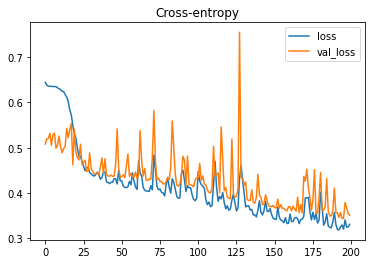

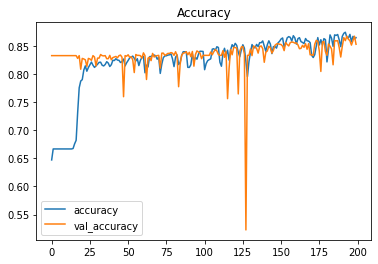

In [141]:
history_df = pd.DataFrame(history4.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

y_pred_SVM = bestNN3.predict_classes(XtrainData)


# print('Classification report: \n', metrics.classification_report(y_test, model))
print('Accuracy_Score:',metrics.accuracy_score(y_train_res, y_pred_SVM)*100,'%')


print('precision_score:',metrics.precision_score(y_train_res, y_pred_SVM)*100,'%')

print('recall_score:',metrics.recall_score(y_train_res, y_pred_SVM)*100,'%')

In [131]:


import timeit

start = timeit.default_timer()

#Your statements here

bestNN2=create_modelWithDropBatch2(hidden_layers= 2, learning_rate= 0.001)
history3 = bestNN2.fit(
     scaled_XKmeans, y_train_res,
    validation_data=(scaled_XValid, y_valid),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)
stop = timeit.default_timer()

print('Time: ', stop - start)  


Epoch 1/200
15/15 [==============================] - 1s 22ms/step - loss: 0.5433 - accuracy: 0.7374 - val_loss: 0.9448 - val_accuracy: 0.1673
Epoch 2/200
15/15 [==============================] - 0s 12ms/step - loss: 0.4138 - accuracy: 0.8215 - val_loss: 1.0830 - val_accuracy: 0.1673
Epoch 3/200
15/15 [==============================] - 0s 11ms/step - loss: 0.3768 - accuracy: 0.8424 - val_loss: 1.0579 - val_accuracy: 0.1673
Epoch 4/200
15/15 [==============================] - 0s 11ms/step - loss: 0.3211 - accuracy: 0.8656 - val_loss: 1.0342 - val_accuracy: 0.1673
Epoch 5/200
15/15 [==============================] - 0s 11ms/step - loss: 0.3259 - accuracy: 0.8645 - val_loss: 0.9897 - val_accuracy: 0.1673
Epoch 6/200
15/15 [==============================] - 0s 11ms/step - loss: 0.3130 - accuracy: 0.8715 - val_loss: 0.9868 - val_accuracy: 0.1673
Epoch 7/200
15/15 [==============================] - 0s 11ms/step - loss: 0.3082 - accuracy: 0.8735 - val_loss: 1.0604 - val_accuracy: 0.1673
Epoch 

15/15 [==============================] - 0s 12ms/step - loss: 0.2237 - accuracy: 0.9074 - val_loss: 0.3176 - val_accuracy: 0.8638
Epoch 59/200
15/15 [==============================] - 0s 13ms/step - loss: 0.2189 - accuracy: 0.9097 - val_loss: 0.2765 - val_accuracy: 0.8830
Epoch 60/200
15/15 [==============================] - 0s 11ms/step - loss: 0.2104 - accuracy: 0.9122 - val_loss: 0.2816 - val_accuracy: 0.8771
Epoch 61/200
15/15 [==============================] - 0s 12ms/step - loss: 0.2171 - accuracy: 0.9089 - val_loss: 0.3158 - val_accuracy: 0.8653
Epoch 62/200
15/15 [==============================] - 0s 13ms/step - loss: 0.2216 - accuracy: 0.9103 - val_loss: 0.2931 - val_accuracy: 0.8801
Epoch 63/200
15/15 [==============================] - 0s 11ms/step - loss: 0.2247 - accuracy: 0.9059 - val_loss: 0.3176 - val_accuracy: 0.8731
Epoch 64/200
15/15 [==============================] - 0s 13ms/step - loss: 0.2146 - accuracy: 0.9144 - val_loss: 0.4092 - val_accuracy: 0.8218
Epoch 65/200

15/15 [==============================] - 0s 11ms/step - loss: 0.1991 - accuracy: 0.9184 - val_loss: 0.2854 - val_accuracy: 0.8791
Epoch 116/200
15/15 [==============================] - 0s 11ms/step - loss: 0.2086 - accuracy: 0.9123 - val_loss: 0.2953 - val_accuracy: 0.8731
Epoch 117/200
15/15 [==============================] - 0s 12ms/step - loss: 0.2057 - accuracy: 0.9134 - val_loss: 0.2717 - val_accuracy: 0.8845
Epoch 118/200
15/15 [==============================] - 0s 10ms/step - loss: 0.1984 - accuracy: 0.9203 - val_loss: 0.2934 - val_accuracy: 0.8771
Epoch 119/200
15/15 [==============================] - 0s 11ms/step - loss: 0.1990 - accuracy: 0.9176 - val_loss: 0.3274 - val_accuracy: 0.8662
Epoch 120/200
15/15 [==============================] - 0s 11ms/step - loss: 0.1989 - accuracy: 0.9207 - val_loss: 0.3130 - val_accuracy: 0.8702
Epoch 121/200
15/15 [==============================] - 0s 11ms/step - loss: 0.1955 - accuracy: 0.9204 - val_loss: 0.2737 - val_accuracy: 0.8825
Epoch 

Epoch 172/200
15/15 [==============================] - 0s 10ms/step - loss: 0.1944 - accuracy: 0.9178 - val_loss: 0.3794 - val_accuracy: 0.8514
Epoch 173/200
15/15 [==============================] - 0s 10ms/step - loss: 0.1890 - accuracy: 0.9236 - val_loss: 0.3352 - val_accuracy: 0.8697
Epoch 174/200
15/15 [==============================] - 0s 12ms/step - loss: 0.1818 - accuracy: 0.9241 - val_loss: 0.3464 - val_accuracy: 0.8613
Epoch 175/200
15/15 [==============================] - 0s 24ms/step - loss: 0.1971 - accuracy: 0.9194 - val_loss: 0.3106 - val_accuracy: 0.8756
Epoch 176/200
15/15 [==============================] - 0s 12ms/step - loss: 0.1952 - accuracy: 0.9199 - val_loss: 0.3194 - val_accuracy: 0.8741
Epoch 177/200
15/15 [==============================] - 0s 10ms/step - loss: 0.1855 - accuracy: 0.9234 - val_loss: 0.3283 - val_accuracy: 0.8697
Epoch 178/200
15/15 [==============================] - 0s 10ms/step - loss: 0.1934 - accuracy: 0.9197 - val_loss: 0.3420 - val_accuracy:

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy_Score: 66.67100977198697 %
precision_score: 66.67100977198697 %
recall_score: 100.0 %


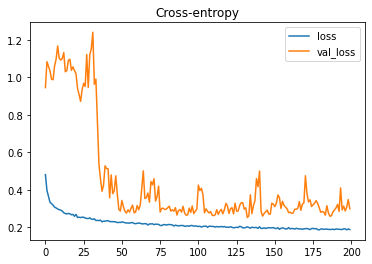

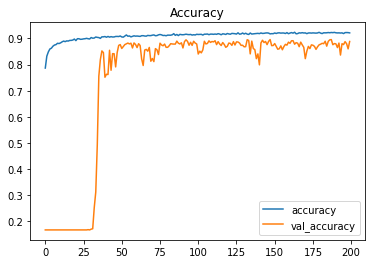

In [132]:
history_df = pd.DataFrame(history3.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

# y_pred_SVM = bestNN2.predict_classes(XtrainData)


# # print('Classification report: \n', metrics.classification_report(y_test, model))
# print('Accuracy_Score:',metrics.accuracy_score(y_train_res, y_pred_SVM)*100,'%')


# print('precision_score:',metrics.precision_score(y_train_res, y_pred_SVM)*100,'%')

# print('recall_score:',metrics.recall_score(y_train_res, y_pred_SVM)*100,'%')

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


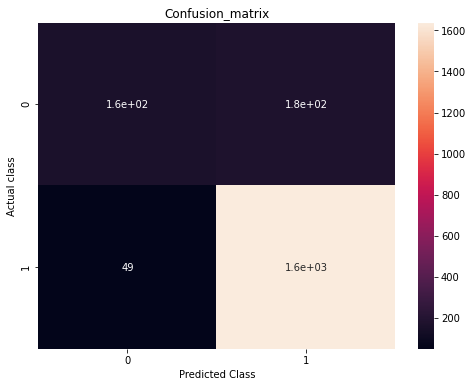

Confusion matrix: 
 [[ 162  177]
 [  49 1638]]
TP:  1638
TN:  162
FP:  177
FN:  49
Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.48      0.59       339
           1       0.90      0.97      0.94      1687

    accuracy                           0.89      2026
   macro avg       0.84      0.72      0.76      2026
weighted avg       0.88      0.89      0.88      2026



/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Training Accuracy_Score: 92.33876221498372 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training Precision: 91.04585825629871 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training Recall: 98.16298612468243 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training F1 Score: 94.47056610870793 %
Validation Accuracy_Score: 88.84501480750247 %
Validation Precision: 90.24793388429751 %
Validation Recall: 97.0954356846473 %
Validation F1 Score: 93.54654483152484 %


In [142]:

plotconfusionMatrix(bestNN2,y_valid['Attrition_Flag'],scaled_XValid)

getMetrics(bestNN2,scaled_XKmeans,y_train_res['Attrition_Flag'],scaled_XValid,y_valid['Attrition_Flag'])

In [90]:
import timeit

start = timeit.default_timer()

#Your statements here

bestNN2=create_modelWithDropBatch(hidden_layers= 2, learning_rate= 0.001)
history3 = bestNN2.fit(
     XtrainData, y_train_res,
    validation_data=(XvalidData, y_valid),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)
stop = timeit.default_timer()

print('Time: ', stop - start)  


Epoch 1/200
15/15 [==============================] - 1s 18ms/step - loss: 0.8632 - accuracy: 0.4324 - val_loss: 0.5199 - val_accuracy: 0.8327
Epoch 2/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6379 - accuracy: 0.5595 - val_loss: 0.5136 - val_accuracy: 0.8327
Epoch 3/200
15/15 [==============================] - 0s 7ms/step - loss: 0.5906 - accuracy: 0.6102 - val_loss: 0.5506 - val_accuracy: 0.8327
Epoch 4/200
15/15 [==============================] - 0s 7ms/step - loss: 0.5462 - accuracy: 0.6781 - val_loss: 0.5859 - val_accuracy: 0.8327
Epoch 5/200
15/15 [==============================] - 0s 7ms/step - loss: 0.5108 - accuracy: 0.7391 - val_loss: 0.5972 - val_accuracy: 0.8327
Epoch 6/200
15/15 [==============================] - 0s 7ms/step - loss: 0.4679 - accuracy: 0.7746 - val_loss: 0.6064 - val_accuracy: 0.8346
Epoch 7/200
15/15 [==============================] - 0s 7ms/step - loss: 0.4433 - accuracy: 0.7987 - val_loss: 0.5476 - val_accuracy: 0.8327
Epoch 8/200


Epoch 59/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2634 - accuracy: 0.9008 - val_loss: 1.1163 - val_accuracy: 0.4773
Epoch 60/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2686 - accuracy: 0.9001 - val_loss: 1.0017 - val_accuracy: 0.5000
Epoch 61/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2553 - accuracy: 0.9005 - val_loss: 0.4226 - val_accuracy: 0.8169
Epoch 62/200
15/15 [==============================] - 0s 8ms/step - loss: 0.2711 - accuracy: 0.8972 - val_loss: 0.3241 - val_accuracy: 0.8736
Epoch 63/200
15/15 [==============================] - 0s 7ms/step - loss: 0.2693 - accuracy: 0.8999 - val_loss: 0.3060 - val_accuracy: 0.8756
Epoch 64/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2668 - accuracy: 0.8977 - val_loss: 0.3825 - val_accuracy: 0.8460
Epoch 65/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2654 - accuracy: 0.8986 - val_loss: 0.4579 - val_accuracy: 0.8124
Epoch 

15/15 [==============================] - 0s 6ms/step - loss: 0.2608 - accuracy: 0.8996 - val_loss: 0.3047 - val_accuracy: 0.8835
Epoch 117/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2610 - accuracy: 0.9006 - val_loss: 0.3922 - val_accuracy: 0.8534
Epoch 118/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2678 - accuracy: 0.8987 - val_loss: 0.3104 - val_accuracy: 0.8761
Epoch 119/200
15/15 [==============================] - 0s 8ms/step - loss: 0.2629 - accuracy: 0.9019 - val_loss: 0.3981 - val_accuracy: 0.8337
Epoch 120/200
15/15 [==============================] - 0s 7ms/step - loss: 0.2521 - accuracy: 0.9075 - val_loss: 0.2984 - val_accuracy: 0.8835
Epoch 121/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2759 - accuracy: 0.8949 - val_loss: 0.6519 - val_accuracy: 0.7103
Epoch 122/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2641 - accuracy: 0.9012 - val_loss: 1.0256 - val_accuracy: 0.5686
Epoch 123/200

15/15 [==============================] - 0s 7ms/step - loss: 0.2494 - accuracy: 0.9023 - val_loss: 0.3096 - val_accuracy: 0.8756
Epoch 174/200
15/15 [==============================] - 0s 7ms/step - loss: 0.2481 - accuracy: 0.9063 - val_loss: 0.2952 - val_accuracy: 0.8840
Epoch 175/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2464 - accuracy: 0.9070 - val_loss: 0.2966 - val_accuracy: 0.8835
Epoch 176/200
15/15 [==============================] - 0s 7ms/step - loss: 0.2581 - accuracy: 0.9025 - val_loss: 0.4157 - val_accuracy: 0.8233
Epoch 177/200
15/15 [==============================] - 0s 7ms/step - loss: 0.2579 - accuracy: 0.9071 - val_loss: 0.3303 - val_accuracy: 0.8712
Epoch 178/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2564 - accuracy: 0.9049 - val_loss: 0.2924 - val_accuracy: 0.8825
Epoch 179/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2641 - accuracy: 0.8954 - val_loss: 0.2920 - val_accuracy: 0.8860
Epoch 180/200

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy_Score: 90.76221498371335 %
precision_score: 91.64777021919879 %
recall_score: 94.78209888606605 %


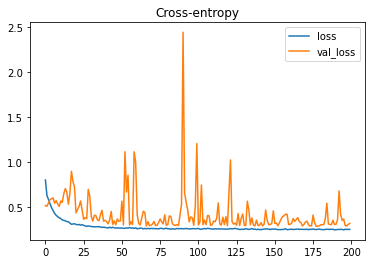

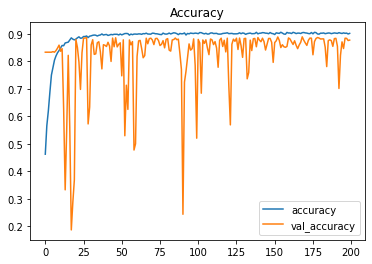

In [93]:
history_df = pd.DataFrame(history3.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

y_pred_SVM = bestNN2.predict_classes(XtrainData)


# print('Classification report: \n', metrics.classification_report(y_test, model))
print('Accuracy_Score:',metrics.accuracy_score(y_train_res, y_pred_SVM)*100,'%')


print('precision_score:',metrics.precision_score(y_train_res, y_pred_SVM)*100,'%')

print('recall_score:',metrics.recall_score(y_train_res, y_pred_SVM)*100,'%')

In [130]:
# sess.run(optimizer._lr)
def create_modelWithDropBatch2(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=input_shape)) #thisone inc
    for i in range(hidden_layers):
          # Add one hidden layer
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(256, activation='relu')) #thisone inc 256

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model



In [94]:
def plotconfusionMatrix(modelObj,ytest,xtest):
#     model_DecTreeClass2.fit(X_train_res, y_train_res)
    y_pred_DecTreeClass2 = modelObj.predict_classes(xtest)
    conf_mat2 = metrics.confusion_matrix(ytest, y_pred_DecTreeClass2)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_mat2,annot=True)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual class")
    plt.show()
    print('Confusion matrix: \n', conf_mat2)
    print('TP: ', conf_mat2[1,1])
    print('TN: ', conf_mat2[0,0])
    print('FP: ', conf_mat2[0,1])
    print('FN: ', conf_mat2[1,0])

def getMetrics(modelObj,xTrain,yTrain,xValid,yValid):
    y_pred_DecTreeClass2 = modelObj.predict_classes(xValid)
    print('Classification report: \n', metrics.classification_report(yValid, y_pred_DecTreeClass2))
    print('Training Accuracy_Score:',metrics.accuracy_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')
    print('Training Precision:',metrics.precision_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')
    print('Training Recall:',metrics.recall_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')
    
    print('Training F1 Score:',metrics.f1_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')

    
    print('Validation Accuracy_Score:',metrics.accuracy_score(yValid, y_pred_DecTreeClass2)*100,'%')
    print('Validation Precision:',metrics.precision_score(yValid, y_pred_DecTreeClass2)*100,'%')
    print('Validation Recall:',metrics.recall_score(yValid, y_pred_DecTreeClass2)*100,'%')
    
    print('Validation F1 Score:',metrics.f1_score(yValid, y_pred_DecTreeClass2)*100,'%')

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


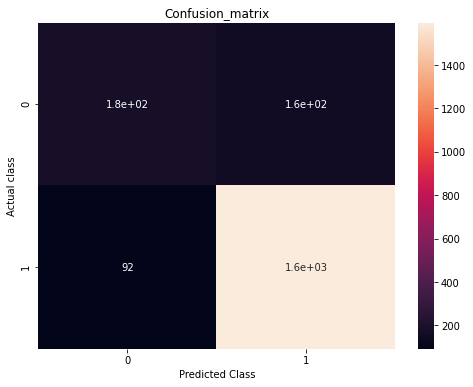

Confusion matrix: 
 [[ 181  158]
 [  92 1595]]
TP:  1595
TN:  181
FP:  158
FN:  92
Classification report: 
               precision    recall  f1-score   support

           0       0.66      0.53      0.59       339
           1       0.91      0.95      0.93      1687

    accuracy                           0.88      2026
   macro avg       0.79      0.74      0.76      2026
weighted avg       0.87      0.88      0.87      2026



/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Training Accuracy_Score: 90.76221498371335 %
Training Precision: 91.64777021919879 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Training Recall: 94.78209888606605 %
Training F1 Score: 93.1885867998847 %
Validation Accuracy_Score: 87.6604146100691 %
Validation Precision: 90.98687963491157 %
Validation Recall: 94.5465323058684 %
Validation F1 Score: 92.73255813953489 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [95]:

plotconfusionMatrix(bestNN2,y_valid['Attrition_Flag'],XvalidData)

getMetrics(bestNN2,XtrainData,y_train_res['Attrition_Flag'],XvalidData,y_valid['Attrition_Flag'])

In [144]:
import timeit

start = timeit.default_timer()

#Your statements here

bestNN=create_modelWithDropBatch(hidden_layers= 6, learning_rate= 0.05)
history2 = bestNN.fit(
     pca_finalDF, y_train_res,
    validation_data=(pcavalidData, y_valid),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)
stop = timeit.default_timer()

print('Time: ', stop - start)  


NameError: name 'pca_finalDF' is not defined

<AxesSubplot:title={'center':'Accuracy'}>

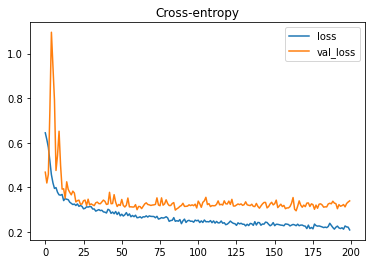

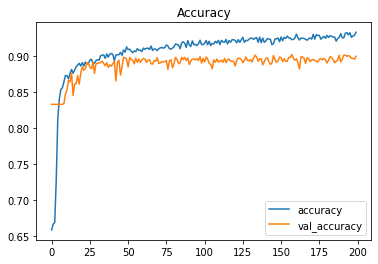

In [26]:
history_df = pd.DataFrame(history2.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [55]:
y_pred_SVM = bestNN.predict_classes(pca_finalDF)


# print('Classification report: \n', metrics.classification_report(y_test, model))
print('Accuracy_Score:',metrics.accuracy_score(y_train_res, y_pred_SVM)*100,'%')


print('precision_score:',metrics.precision_score(y_train_res, y_pred_SVM)*100,'%')

print('recall_score:',metrics.recall_score(y_train_res, y_pred_SVM)*100,'%')

Accuracy_Score: 33.328990228013026 %
precision_score: 0.0 %
recall_score: 0.0 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:

plotconfusionMatrix(bestNN,y_valid['Attrition_Flag'],pcavalidData)

getMetrics(bestNN,pca_finalDF,y_train_res['Attrition_Flag'],pcavalidData,y_valid['Attrition_Flag'])

NameError: name 'bestNN' is not defined